In [16]:
# Bibliotecas que serão usadas
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Carregar os dados
dict_vendas = {
  'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
  'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}
df = pd.DataFrame(dict_vendas)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [3]:
# Tratar os dados
meses_map = {'Janeiro': 1, 'Fevereiro': 2, 'Março': 3, 'Abril': 4, 'Maio': 5, 'Junho': 6, 'Julho': 7, 'Agosto': 8, 'Setembro': 9, 'Outubro': 10, 'Novembro': 11, 'Dezembro': 12}
df['num_mes'] = df['mes'].map(meses_map)
df.head(12)

,mes,vendas,num_mes
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [10]:
# Vamos agora definir as variáveis dependentes e independentes do modelo
X = df[['num_mes']] # Independentes
y = df['vendas'] # Dependente, nosso target

In [17]:
# Treinamento de modelo de regressão linear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression().fit(X_train, y_train)

# Coeficientes do modelo
coeficiente = model.coef_[0]
interceptor = model.intercept_

# Predição de valores
y_pred = model.predict(X)

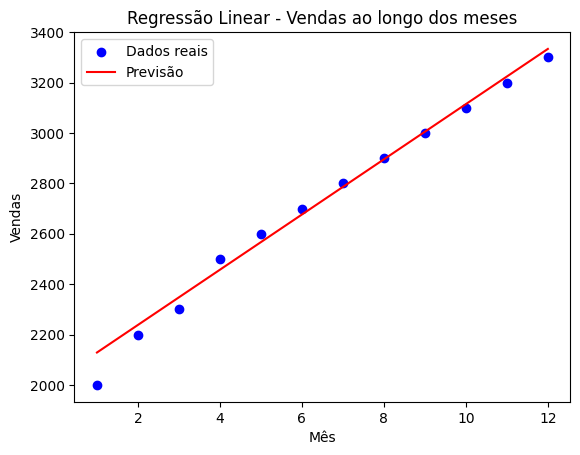

In [18]:
# Visualizando os resultados
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, y_pred, color='red', label='Previsão')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Regressão Linear - Vendas ao longo dos meses')
plt.legend()
plt.show()

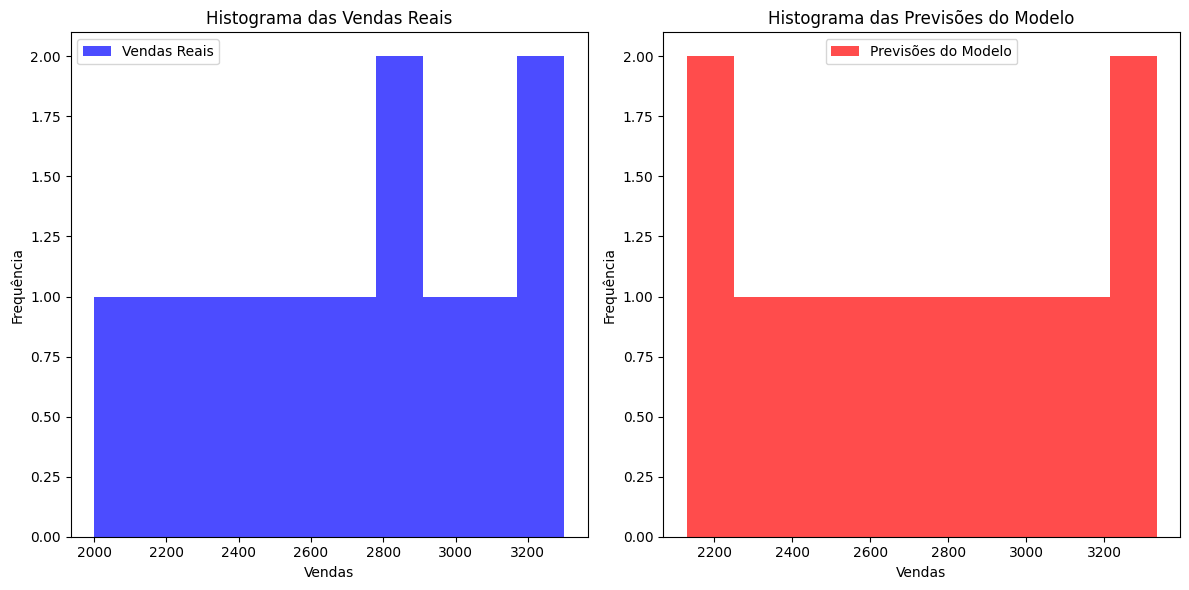

In [19]:
# Plotando o histograma das vendas reais
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y, bins=10, color='blue', alpha=0.7, label='Vendas Reais')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.title('Histograma das Vendas Reais')
plt.legend()

# Plotando o histograma das previsões do modelo
plt.subplot(1, 2, 2)
plt.hist(y_pred, bins=10, color='red', alpha=0.7, label='Previsões do Modelo')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.title('Histograma das Previsões do Modelo')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
# Previsão de Dezembro

# Dada a equação y = ax + b
# Temos
# vendas = coeficiente * mes + interceptor
y = coeficiente * 12 + interceptor
y

3333.3333333333335